In [1]:
%load_ext autoreload
%autoreload 2

import FMCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


import sys
import os

from src.kde import *
from src.cdf import *
from src.pinball_crps import *
from src.miscellaneous import *

KernelMatrix

In [2]:
xtrain = np.load("data/data_21_23.npy")
# data 2023 test data
xtest=xtrain[365:,:]
# data 2021 train data
xtrain=xtrain[0:366,:]
# m rows
m=xtrain.shape[0]
# n columns
n=xtrain.shape[1]

Kernel Hour wise

In [3]:
# select hour of interest
n=8

KernelMeanEmbedding

In [4]:
xtrain_n=xtrain[1:, n].reshape(1,m-1)
xtest_n=xtest[1:, n]
# get mean and sigma of train data for selected hour n
mu=np.mean(xtrain_n)
sigma=np.std(xtrain_n)

In [5]:
# set Kde
Kernel=Kde("Exponential", 1)


In [6]:
# compute Kme
Kernel.Kme(xtrain_n)

In [7]:
# test for comparing with sklearn implementation

# from sklearn.neighbors import KernelDensity

# b=np.linspace(xtrain_n.min(), xtrain_n.max(), 1000)
# kde = KernelDensity(kernel='exponential', bandwidth=10).fit(xtrain_n.reshape(365,1))
# a=kde.score_samples(b.reshape(-1,1))


# plt.plot(b, np.exp(a))
# pd.Series(xtrain_n.reshape(365,)).plot.hist(bins=20, density=True, edgecolor='w', linewidth=0.5)


# Kernel.y_axis/np.exp(a)

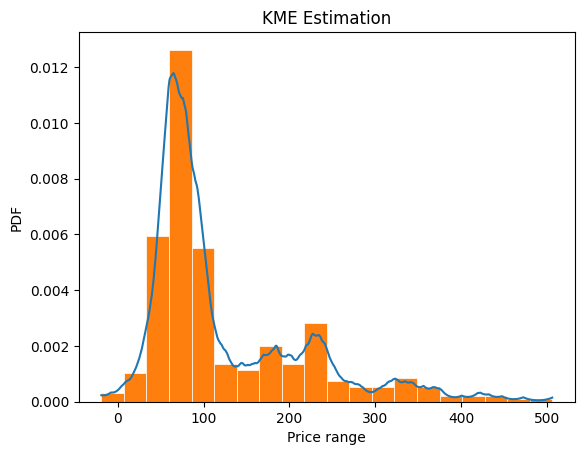

In [9]:
Kernel.PlotKde(nbin=20)

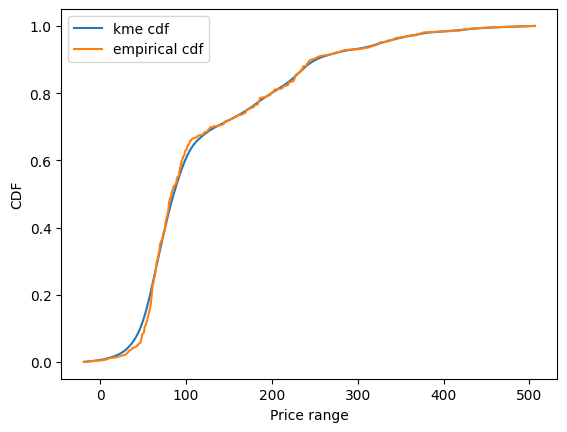

In [10]:
plt.plot(Kernel.x_axis, np.cumsum(Kernel.y_axis)/np.sum(Kernel.y_axis), label="kme cdf")
plt.plot(np.sort(xtrain_n.reshape(365,)), cdf_funct(np.sort(xtrain_n.reshape(365,))), label="empirical cdf");

plt.xlabel("Price range")
plt.ylabel("CDF")
plt.legend()

In [11]:
xcdf=Kernel.x_axis
ycdf=(np.cumsum(Kernel.y_axis)/np.sum(Kernel.y_axis))

xpdf=Kernel.x_axis
ypdf=Kernel.y_axis

In [12]:
# random sample as many elements as size of test data
np.random.seed(10)
unif=np.random.uniform(0,1,xtrain_n.size)


# simulate data based on the kde learned from train data
x_sample=[inv_cdf_funct(unif[i], xtrain_n) for i in range(len(unif))]
x_sample=np.array(x_sample)

Text(0.5, 1.0, 'Inverse Cdf')

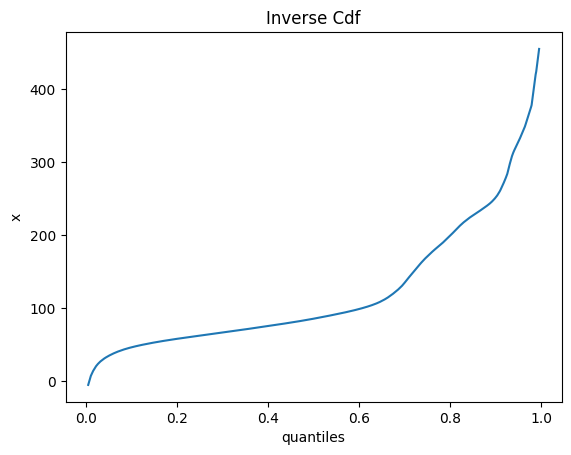

In [13]:
x_sample_kme=[phi_inv(i, xpdf,ypdf, xcdf, ycdf) for i in unif]

s_unif=np.sort(unif)
plt.plot(s_unif, [phi_inv(i, xpdf,ypdf, xcdf, ycdf) for i in s_unif])
plt.xlabel("quantiles")
plt.ylabel("x")
plt.title("Inverse Cdf")

# here i compare rotated inverse cdf with the cdf, we observe they overlap so it is good
# plt.plot([phi_inv(i, xpdf,ypdf, xcdf, ycdf) for i in s_unif], s_unif)
# plt.plot(Kernel.x_axis, np.cumsum(Kernel.y_axis)/np.sum(Kernel.y_axis))

Text(0.5, 1.0, 'Simulated Data vs Observed Data')

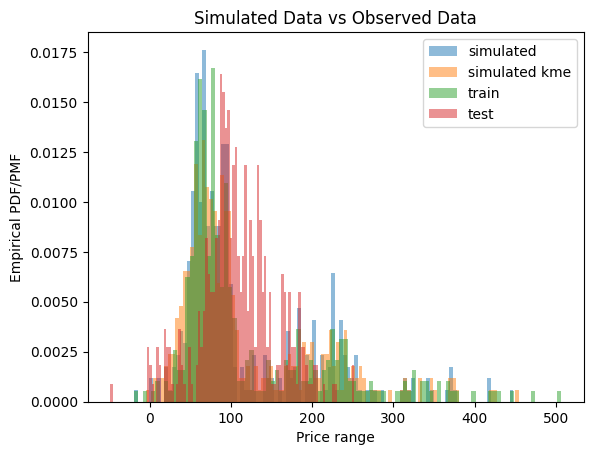

In [14]:
plt.hist(x_sample, density=True, bins=100, alpha=0.5, label="simulated");
plt.hist(x_sample_kme, density=True, bins=100, alpha=0.5, label="simulated kme");


plt.hist(Kernel.data, bins=100, density=True, alpha=0.5, label="train");
plt.hist(xtest_n, bins=100, density=True, alpha=0.5, label="test");

plt.xlabel("Price range")
plt.ylabel("Empirical PDF/PMF")
plt.legend()
plt.title("Simulated Data vs Observed Data")

CPRS

In [15]:
CRPS(x_sample_kme, xtest_n)

TypeError: only integer scalar arrays can be converted to a scalar index

In [16]:
xtest_n

array([ -1.23, 125.92, 186.56, 158.76, 146.72, 141.65, 140.89, 143.95,
       172.54, 185.3 , 180.04, 185.05, 184.41, 162.25, 164.6 , 185.33,
       203.74, 196.18, 189.15, 225.3 , 174.79, 173.65, 249.3 , 251.92,
       228.4 , 206.64, 199.77, 171.96, 156.53, 173.92, 192.33, 183.33,
       179.04, 177.03, 164.08, 142.66, 204.11, 193.19, 186.09, 187.02,
       185.2 , 166.81, 148.16, 191.55, 189.94, 176.11, 171.86, 168.58,
       148.65, 127.09, 159.02, 167.42, 167.06, 169.01, 161.87, 147.95,
       126.93, 172.59, 171.42, 164.37, 166.1 , 165.89, 153.88, 137.69,
       179.75, 163.06, 163.42, 150.62, 135.4 , 139.07, 103.  , 131.91,
       140.43, 155.83, 129.15, 114.14,  91.99, 104.72, 141.92, 133.41,
       107.46, 103.26, 123.89,  94.24,  93.76, 124.55, 132.87, 132.09,
       116.1 , 122.22,  92.48,  92.46, 135.9 , 142.35, 139.83, 138.1 ,
       132.51, 117.65,  94.54,  17.83, 134.38, 136.74, 146.06, 140.97,
       121.63, 103.02, 136.74, 135.47, 125.32, 138.56, 127.78, 103.14,
      

In [67]:
x_sample_rpol=np.load("data/simulations/sim_rpol.npy")
x_sample_bspl=np.load("data/simulations/sim_bspl_sub.npy")
x_sample_spl_rpol=np.load("data/simulations/sim_spl_rpol.npy")
x_sample_kernel_herding=np.load("data/simulations/sim_kernel_herding.npy")

print("rpol", CRPS(x_sample_rpol, xtest_n))
print("bspl", CRPS(x_sample_bspl, xtest_n))
print("spl_rpol", CRPS(x_sample_spl_rpol, xtest_n))
print("kernel_herding", CRPS(x_sample_kernel_herding, xtest_n))

rpol 10.748796020882477
bspl 10.812242402108875
spl_rpol 10.818400771142809
kernel_herding 11.009800137115741
